# import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report ,accuracy_score
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier

# Read the dataset using pandas library

In [ ]:
dataset_path = "drive/MyDrive/G13/apartment_cost_list.csv"
df = pd.read_csv(dataset_path)

In [ ]:
df.shape

(19613, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19613 entries, 0 to 19612
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Job #                   19613 non-null  int64 
 1   Borough                 19613 non-null  object
 2   House #                 19613 non-null  object
 3   Street Name             19613 non-null  object
 4   Block                   19613 non-null  int64 
 5   Lot                     19613 non-null  int64 
 6   Bin #                   19613 non-null  int64 
 7   Job Type                19613 non-null  object
 8   Community - Board       19613 non-null  int64 
 9   Curb Cut                16 non-null     object
 10  Fully Permitted         15625 non-null  object
 11  Initial Cost            19613 non-null  object
 12  Proposed Zoning Sqft    19613 non-null  int64 
 13  Horizontal Enlrgmt      163 non-null    object
 14  Vertical Enlrgmt        242 non-null    object
 15  En

The describe() method returns description of the data in the DataFrame.

If the DataFrame contains numerical data, the description contains these information for each column:

* count - The number of not-empty values.
* mean - The average (mean) value.
* std - The standard deviation.
* min - the minimum value.
* 25% - The 25% percentile*.
* 50% - The 50% percentile*.
* 75% - The 75% percentile*.
* max - the maximum value.

In [ ]:
df.describe()

,Job #,Block,Lot,Bin #,Community - Board,Proposed Zoning Sqft,Enlargement SQ Footage
count,1.961300e+04,19613.000000,19613.000000,1.961300e+04,19613.000000,19613.000000,19613.000000
mean,1.624266e+08,1551.725794,1261.811197,1.506365e+06,151.269005,719.625809,18.639219
std,9.157722e+07,1550.780753,2764.626109,9.319992e+05,90.115653,10859.926278,303.278381
min,1.021331e+08,0.000000,0.000000,1.000043e+06,101.000000,0.000000,0.000000
25%,1.048244e+08,816.000000,17.000000,1.028758e+06,105.000000,0.000000,0.000000
50%,1.217112e+08,1245.000000,36.000000,1.046983e+06,107.000000,0.000000,0.000000
75%,1.408258e+08,1576.000000,66.000000,1.084564e+06,111.000000,0.000000,0.000000
max,5.401803e+08,16278.000000,9007.000000,5.860016e+06,503.000000,724475.000000,29687.000000


In [ ]:
df.head()

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description
0,123768976,MANHATTAN,1598,2ND AVENUE,1545,49,1049907,A2,108,NaN,NaN,$65000.00,0,NaN,NaN,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...
1,140922893,MANHATTAN,160,E 89 ST,1517,43,1048094,A2,108,NaN,07/14/2020,$85000.00,0,NaN,NaN,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...
2,301773579,BROOKLYN,65,GATES AVENUE,1962,86,3056039,A1,302,NaN,05/23/2007,$60000.00,0,NaN,NaN,0,R6,Change existing four story and basement brick ...
3,301976057,BROOKLYN,1401,OCEAN AVENUE,7584,35,3206621,A2,314,NaN,02/28/2006,$75000.00,0,NaN,NaN,0,NaN,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...
4,301989276,BROOKLYN,154,NOBLE STREET,2573,10,3065099,A1,301,NaN,09/29/2006,$40000.00,0,NaN,NaN,0,C4-3,New C of O for existing building. New duplex a...


In [ ]:
df.columns

Index(['Job #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot', 'Bin #',
       'Job Type', 'Community - Board', 'Curb Cut', 'Fully Permitted',
       'Initial Cost', 'Proposed Zoning Sqft', 'Horizontal Enlrgmt',
       'Vertical Enlrgmt', 'Enlargement SQ Footage', 'Zoning Dist1',
       'Job Description'],
      dtype='object')

# Data preprocessing and cleaning

In [ ]:
df.isnull().sum()

Job #                         0
Borough                       0
House #                       0
Street Name                   0
Block                         0
Lot                           0
Bin #                         0
Job Type                      0
Community - Board             0
Curb Cut                  19597
Fully Permitted            3988
Initial Cost                  0
Proposed Zoning Sqft          0
Horizontal Enlrgmt        19450
Vertical Enlrgmt          19371
Enlargement SQ Footage        0
Zoning Dist1               2096
Job Description               0
dtype: int64

In [ ]:
# Drop unwanted columns
df = df.drop(["Job #", "House #", "Street Name", "Block", "Lot", "Bin #",
         "Job Type", "Community - Board", "Curb Cut", "Fully Permitted",
         "Zoning Dist1", "Job Description"], axis=1)


In [ ]:
# Show the data type for every feature
df.dtypes

Borough                   object
Initial Cost              object
Proposed Zoning Sqft       int64
Horizontal Enlrgmt        object
Vertical Enlrgmt          object
Enlargement SQ Footage     int64
dtype: object

In [ ]:
# Convert (Cast) every "object" to str, so the code can deal with it
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = df[column].astype(str)


In [ ]:
# print the dataFrame
df

,Borough,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage
0,MANHATTAN,$65000.00,0,nan,nan,0
1,MANHATTAN,$85000.00,0,nan,nan,0
2,BROOKLYN,$60000.00,0,nan,nan,0
3,BROOKLYN,$75000.00,0,nan,nan,0
4,BROOKLYN,$40000.00,0,nan,nan,0
...,...,...,...,...,...,...
19608,MANHATTAN,$60000.00,0,nan,nan,0
19609,MANHATTAN,$40000.00,0,nan,nan,0
19610,MANHATTAN,$80000.00,0,nan,nan,0
19611,BRONX,$40000.00,0,nan,nan,0


In [ ]:
# Clean the data in the "Initial Cost" column.
df["Initial Cost"] = df["Initial Cost"].str.replace("$", "")
df["Initial Cost"] = df["Initial Cost"].str.replace(",", "").astype(float)

# Clean the data in the "Horizontal Enlrgmt" & "Vertical Enlrgmt" columns
df['Horizontal Enlrgmt'] = df['Horizontal Enlrgmt'].str.replace("nan", "F")
df['Vertical Enlrgmt'] = df['Vertical Enlrgmt'].str.replace("nan", "F")


<ipython-input-65-a50e1e304c62>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Initial Cost"] = df["Initial Cost"].str.replace("$", "")


In [ ]:
# Create a LabelEncoder object
encoder = LabelEncoder()

# Encode all text columns
for column in df.select_dtypes(include='object'):
  df[column] = encoder.fit_transform(df[column])

# after encoding: 
# -> df['Horizontal Enlrgmt'] values will be: (Y = 1, F = 0)
# -> df['Vertical Enlrgmt'] values will be: (Y = 2, F = 0)


In [ ]:
# print the dataFrame
df

,Borough,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage
0,2,65000.0,0,0,0,0
1,2,85000.0,0,0,0,0
2,1,60000.0,0,0,0,0
3,1,75000.0,0,0,0,0
4,1,40000.0,0,0,0,0
...,...,...,...,...,...,...
19608,2,60000.0,0,0,0,0
19609,2,40000.0,0,0,0,0
19610,2,80000.0,0,0,0,0
19611,0,40000.0,0,0,0,0


In [ ]:
initial_cost = df["Initial Cost"]

# Sort the values in the "Initial Cost" feature.
initial_cost.sort_values()

# Create a new column called "Class".
df["Class"] = ""

# Assign the following values to the "Class" column:
#   * "Low" if the value in the "Initial Cost" feature is less than or equal to the median value.
#   * "Medium" if the value in the "Initial Cost" feature is greater than the median value and less than or equal to the 75th percentile value.
#   * "High" if the value in the "Initial Cost" feature is greater than the 75th percentile value.

median = initial_cost.median()
q75 = initial_cost.quantile(0.75)


for i in range(len(df)):
    if initial_cost[i] <= median:
        df["Class"][i] = "Low"
    elif initial_cost[i] > median and initial_cost[i] <= q75:
        df["Class"][i] = "Medium"
    else:
        df["Class"][i] = "High"


<ipython-input-68-029e7b061d54>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Class"][i] = "Medium"
<ipython-input-68-029e7b061d54>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Class"][i] = "High"
<ipython-input-68-029e7b061d54>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Class"][i] = "Low"


## Draw bar chart for the number of values in each class

Number of the classes: 3

Number of values in each class:
Low       9921
Medium    5399
High      4293
Name: Class, dtype: int64 



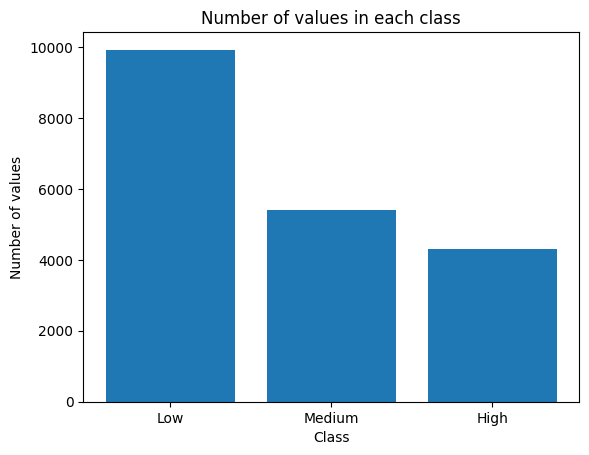

In [ ]:
# Count the number of unique values in the "Class" column.
num_classes = len(df["Class"].unique())
print(f"Number of the classes: {num_classes}")

# Count the number of values in each class.
class_counts = df["Class"].value_counts()
print(f"\nNumber of values in each class:\n{class_counts} \n")

# Create a bar chart of the number of values in each class.
plt.bar(class_counts.index, class_counts.values)

# Label the axes.
plt.xlabel("Class")
plt.ylabel("Number of values")

# Title the plot.
plt.title("Number of values in each class")

# Show the plot.
plt.show()


In [ ]:
# set features to x after drop target column
x = df.drop(['Class'], axis=1)

# set target to y, which already dropped from x(features)
y = df['Class']

In [ ]:
print(f"x(features) shape: {x.shape}")
print(f"y(target) shape: {y.shape}")

x(features) shape: (19613, 6)
y(target) shape: (19613,)


In [ ]:
# assign feature names to features variable
features = x.columns
features

Index(['Borough', 'Initial Cost', 'Proposed Zoning Sqft', 'Horizontal Enlrgmt',
       'Vertical Enlrgmt', 'Enlargement SQ Footage'],
      dtype='object')

# Data visualization

<Axes: ylabel='Frequency'>

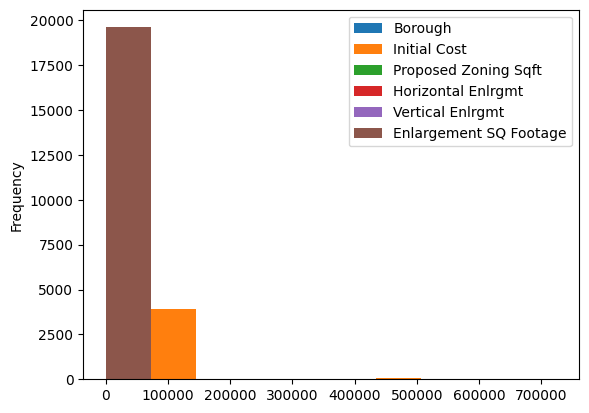

In [ ]:
df.plot.hist()

<Axes: ylabel='Density'>

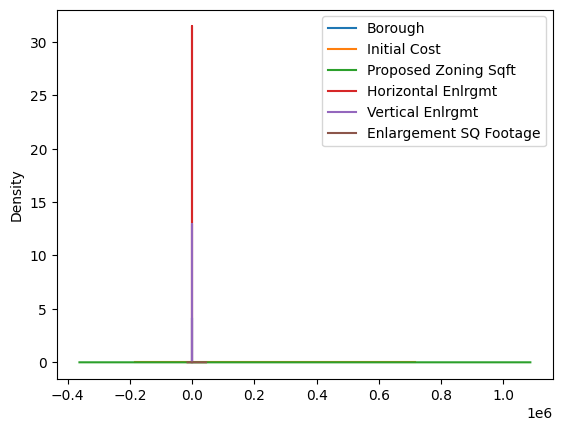

In [ ]:
df.plot.kde()

# Spliting the data

In [ ]:
x_train ,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40, shuffle = True)

# **Feature selection techniques**

There is no need to use it, because I just got 0.99 & 0.87 accuracy from the models and I did it manually :D

# THE MODELS

## Naïve Bayes Classifier (GaussianNB)


In [ ]:
naiveClass = GaussianNB()

naiveClass.fit(x_train,y_train)
y_pred = naiveClass.predict(x_test)
y_pred_proba = naiveClass.predict_proba(x_test)

print(f'The Score of training is : {naiveClass.score(x_train,y_train)}')
print(f'The Score of testing is : {naiveClass.score(x_test,y_test)}')
print(f'The No. of classes is : {naiveClass.classes_}')

print('-----------------------------------------------------------------------------')
print(f'Values of prediction are : {y_pred}')
print('-----------------------------------------------------------------------------')
print(f'Values probabilities : {y_pred_proba}')

The Score of training is : 0.8479286169534735
The Score of testing is : 0.8529186846800918
The No. of classes is : ['High' 'Low' 'Medium']
-----------------------------------------------------------------------------
Values of prediction are : ['Medium' 'Medium' 'Low' ... 'Medium' 'Medium' 'High']
-----------------------------------------------------------------------------
Values probabilities : [[6.80467870e-02 3.87521115e-01 5.44432098e-01]
 [3.63248325e-01 1.10961883e-05 6.36740579e-01]
 [4.63662183e-02 9.53520194e-01 1.13587343e-04]
 ...
 [1.92549861e-02 1.74504305e-02 9.63294583e-01]
 [1.92549861e-02 1.74504305e-02 9.63294583e-01]
 [9.95599184e-01 1.64494700e-07 4.40065116e-03]]


### Evaluation the model

In [ ]:
# accuracy = accuracy_score(y_test, y_pred , normalize = True)
# print(f'the accuracy is : {accuracy}')

train_accuracy = accuracy_score(y_train, naiveClass.predict(x_train))
print(f"The train accuracy is: {train_accuracy}")

test_accuracy = accuracy_score(y_test, y_pred)
print(f"The test accuracy is: {test_accuracy}")


print(f"\nClassification report:\n\n{classification_report(y_test, y_pred)}")

The train accuracy is: 0.8479286169534735
The test accuracy is: 0.8529186846800918

Classification report:

              precision    recall  f1-score   support

        High       0.96      0.63      0.76       825
         Low       0.99      0.87      0.93      2021
      Medium       0.66      0.98      0.79      1077

    accuracy                           0.85      3923
   macro avg       0.87      0.83      0.83      3923
weighted avg       0.90      0.85      0.86      3923



### The confusion matrix for the model

Text(0.5, 23.52222222222222, 'Predicted label')

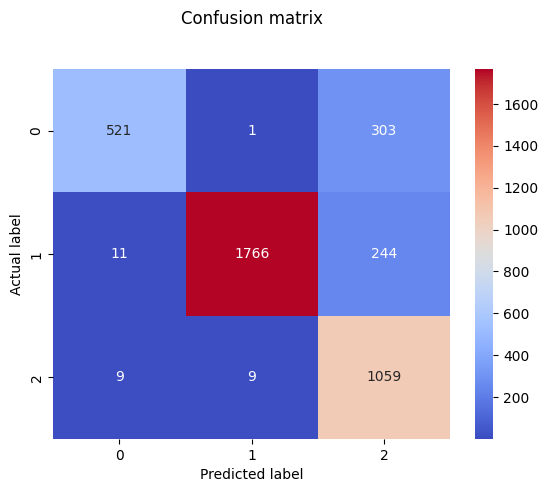

In [ ]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True, cmap="coolwarm",fmt='d') 
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Naïve Bayes Classifier (CategoricalNB)


In [ ]:
naiveClass = CategoricalNB()

naiveClass.fit(x_train,y_train)
y_pred = naiveClass.predict(x_test)
y_pred_proba = naiveClass.predict_proba(x_test)

print(f'The Score of training is : {naiveClass.score(x_train,y_train)}')
print(f'The Score of testing is : {naiveClass.score(x_test,y_test)}')
print(f'The No. of classes is : {naiveClass.classes_}')

print('-----------------------------------------------------------------------------')
print(f'Values of prediction are : {y_pred}')
print('-----------------------------------------------------------------------------')
print(f'Values probabilities : {y_pred_proba}')

The Score of training is : 0.998597833014659
The Score of testing is : 0.9987254652052001
The No. of classes is : ['High' 'Low' 'Medium']
-----------------------------------------------------------------------------
Values of prediction are : ['Low' 'High' 'Low' ... 'Medium' 'Medium' 'High']
-----------------------------------------------------------------------------
Values probabilities : [[1.52319320e-04 9.99568591e-01 2.79089833e-04]
 [9.86416550e-01 1.15296097e-02 2.05384044e-03]
 [9.88753230e-05 9.99719959e-01 1.81166101e-04]
 ...
 [3.70728629e-04 3.81323047e-03 9.95816041e-01]
 [3.70728629e-04 3.81323047e-03 9.95816041e-01]
 [9.93615814e-01 4.81889309e-03 1.56529245e-03]]


### Evaluation the model

In [ ]:
# accuracy = accuracy_score(y_test, y_pred , normalize = True)
# print(f'the accuracy is : {accuracy}')

train_accuracy = accuracy_score(y_train, naiveClass.predict(x_train))
print(f"The train accuracy is: {train_accuracy}")

test_accuracy = accuracy_score(y_test, y_pred)
print(f"The test accuracy is: {test_accuracy}")


print(f"\nClassification report:\n\n{classification_report(y_test, y_pred)}")

The train accuracy is: 0.998597833014659
The test accuracy is: 0.9987254652052001

Classification report:

              precision    recall  f1-score   support

        High       1.00      0.99      1.00       825
         Low       1.00      1.00      1.00      2021
      Medium       1.00      1.00      1.00      1077

    accuracy                           1.00      3923
   macro avg       1.00      1.00      1.00      3923
weighted avg       1.00      1.00      1.00      3923



### The confusion matrix for the model

Text(0.5, 23.52222222222222, 'Predicted label')

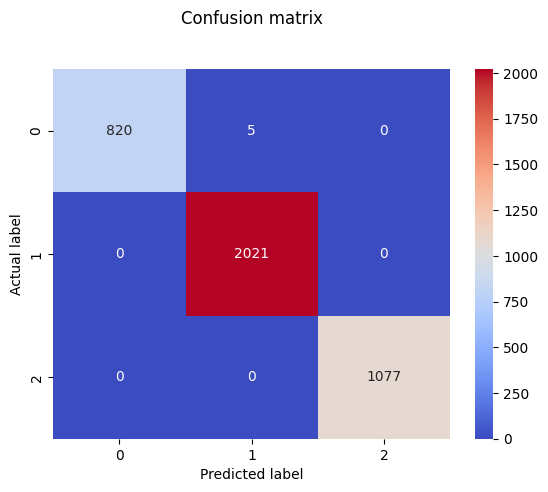

In [ ]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True, cmap="coolwarm",fmt='d') 
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##  KNN (K-Nearest Neighbor) classifier

In [ ]:
# Create a KNN (K-Nearest Neighbor) classifier instance
knnClass = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the transformed training set
knnClass.fit(x_train, y_train)

# Make predictions on the transformed test set
y_pred = knnClass.predict(x_test)


print(f'The Score of training is : {knnClass.score(x_train,y_train)}')
print(f'The Score of testing is : {knnClass.score(x_test,y_test)}')
print(f'The No. of classes is : {knnClass.classes_}')

print('-----------------------------------------------------------------------------')
print(f'Values of prediction are : {y_pred}')
print('-----------------------------------------------------------------------------')
print(f'Values probabilities : {y_pred_proba}')

The Score of training is : 0.9994263862332696
The Score of testing is : 0.99923527912312
The No. of classes is : ['High' 'Low' 'Medium']
-----------------------------------------------------------------------------
Values of prediction are : ['Low' 'High' 'Low' ... 'Medium' 'Medium' 'High']
-----------------------------------------------------------------------------
Values probabilities : [[1.52319320e-04 9.99568591e-01 2.79089833e-04]
 [9.86416550e-01 1.15296097e-02 2.05384044e-03]
 [9.88753230e-05 9.99719959e-01 1.81166101e-04]
 ...
 [3.70728629e-04 3.81323047e-03 9.95816041e-01]
 [3.70728629e-04 3.81323047e-03 9.95816041e-01]
 [9.93615814e-01 4.81889309e-03 1.56529245e-03]]


### Evaluation the model

In [ ]:
# accuracy = accuracy_score(y_test, y_pred, normalize = True)
# print(f'the accuracy is : {accuracy}')

train_accuracy = accuracy_score(y_train, knnClass.predict(x_train))
print(f"The train accuracy is: {train_accuracy}")

test_accuracy = accuracy_score(y_test, y_pred)
print(f"The test accuracy is: {test_accuracy}")


print(f"\nClassification report: \n\n{classification_report(y_test, y_pred)}")

The train accuracy is: 0.9994263862332696
The test accuracy is: 0.99923527912312

Classification report: 

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       825
         Low       1.00      1.00      1.00      2021
      Medium       1.00      1.00      1.00      1077

    accuracy                           1.00      3923
   macro avg       1.00      1.00      1.00      3923
weighted avg       1.00      1.00      1.00      3923



### The confusion matrix for the model

Text(0.5, 23.52222222222222, 'Predicted label')

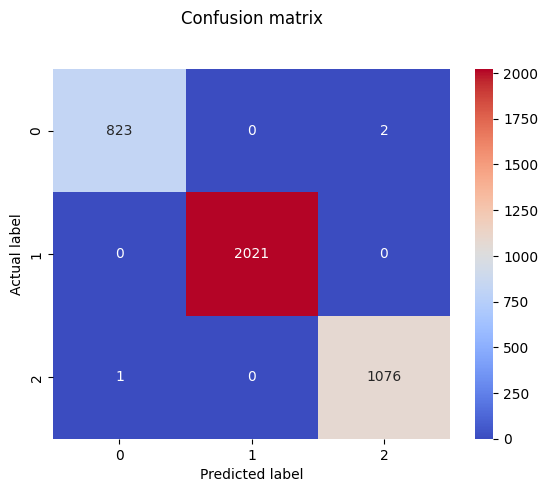

In [ ]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True, cmap="coolwarm",fmt='d') 
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')